# Kaggle Competition Analysis
## *House Prices - Advanced Regression Techniques*
### *Predict sales prices and practice feature engineering, RFs, and gradient boosting*

## **Part 1: Collect data from Kaggle**

In [22]:
# Declare variable for latest api_token from kaggle account
creds = '{"username":"alexwurm","key":"b2d0aafea61e20ebb547c35b41428a1c"}'

In [23]:
# Find home directory
import os
root = os.path.expanduser('~')
root

'/Users/alexwurm'

In [24]:
if not os.path.exists(f'{root}/.kaggle'):
    ! mkdir ~/.kaggle
    ! touch ~/.kaggle/kaggle.json

In [25]:
# Overwrite the kaggle.json file with the latest authorization
import json
with open(f'{root}/.kaggle/kaggle.json','w') as auth_file:
    json.dump(creds, auth_file)

In [26]:
# Change permissions so the kaggle authentication file can be read from
! chmod 600 ~/.kaggle/kaggle.json

In [27]:
# For remote server (e.g., Github Codespace) manually configure authentication details in the environment
x = json.loads(creds)

os.environ['KAGGLE_USERNAME'] = x['username']
os.environ['KAGGLE_KEY'] = x['key']

In [28]:
# Install kaggle library
! pip install kaggle

In [29]:
# Access the kaggle api to download the relevant competition data
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
# Unzip the data
import zipfile
zipfile.ZipFile('./house-prices-advanced-regression-techniques.zip').extractall('./house-prices')

## **Part 2: View and Preprocess the data**

In [31]:
from pathlib import Path
path = Path('house-prices')

import pandas as pd

# Read in the train and test datasets
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

# Set visualization options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
# View all columns with corresponding types
for column in train.columns:
    print(f'{column}: {pd.api.types.infer_dtype(train[column])}')

Id: integer
MSSubClass: integer
MSZoning: string
LotFrontage: floating
LotArea: integer
Street: string
Alley: string
LotShape: string
LandContour: string
Utilities: string
LotConfig: string
LandSlope: string
Neighborhood: string
Condition1: string
Condition2: string
BldgType: string
HouseStyle: string
OverallQual: integer
OverallCond: integer
YearBuilt: integer
YearRemodAdd: integer
RoofStyle: string
RoofMatl: string
Exterior1st: string
Exterior2nd: string
MasVnrType: string
MasVnrArea: floating
ExterQual: string
ExterCond: string
Foundation: string
BsmtQual: string
BsmtCond: string
BsmtExposure: string
BsmtFinType1: string
BsmtFinSF1: integer
BsmtFinType2: string
BsmtFinSF2: integer
BsmtUnfSF: integer
TotalBsmtSF: integer
Heating: string
HeatingQC: string
CentralAir: string
Electrical: string
1stFlrSF: integer
2ndFlrSF: integer
LowQualFinSF: integer
GrLivArea: integer
BsmtFullBath: integer
BsmtHalfBath: integer
FullBath: integer
HalfBath: integer
BedroomAbvGr: integer
KitchenAbvGr: in

In [34]:
# Find fields with missing values
train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [35]:
# Set the dependent variable to predict with any models
dep_var = 'SalePrice'

In [36]:
# Create TabularPandas object for training data
from fastai.tabular.all import *

procs = [Categorify, FillMissing]
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
cont, cat = cont_cat_split(train, 1, dep_var=dep_var)

true_cats = [
            'MSSubClass', 'OverallQual', 'OverallCond',  'BsmtFullBath',
            'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
            ]

# Manual adjustment, move each field in true_cats from cont to cat
for x in true_cats:
    cont.remove(x)
    cat.append(x)

tp = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

tp.show(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
33,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,20,5,5,0,1,1,1,4,1,6,1,2,False,False,False,34,70.0,10552,1959,1959,0.0,1018,0,380,1398,1700,0,0,1700,1959.0,447,0,38,0,0,0,0,0,4,2010,165500
321,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,60,8,5,1,0,2,1,4,1,10,1,3,False,False,False,322,99.0,12099,2004,2004,388.0,970,0,166,1136,1136,1332,0,2468,2004.0,872,184,154,0,0,0,0,0,6,2007,354000
635,RH,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,Hip,CompShg,VinylSd,VinylSd,None,Fa,TA,CBlock,TA,Fa,No,LwQ,Unf,GasA,Ex,Y,FuseA,Fa,Typ,#na#,#na#,#na#,#na#,#na#,N,#na#,#na#,#na#,WD,Abnorml,190,6,7,0,0,2,0,8,2,14,0,0,False,False,True,636,60.0,10896,1914,1995,0.0,256,0,1184,1440,1440,1440,515,3395,1980.5,0,0,110,0,0,0,0,0,3,2007,200000


In [37]:
# View underlying values for the TabularPandas object
tp.items.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
33,34,1,4,70.0,10552,2,0,1,4,1,5,1,13,3,3,1,3,5,4,1959,1959,4,2,4,4,3,0.0,4,5,2,4,4,4,5,1018,6,0,380,1398,2,3,2,5,1700,0,0,1700,1,2,2,2,5,1,3,5,7,2,3,2,1959.0,2,3,447,5,5,3,0,38,0,0,0,0,0,0,0,0,4,2010,9,5,165500,1,1,1
321,322,6,4,99.0,12099,2,0,1,4,1,5,1,17,3,3,1,6,8,4,2004,2004,2,2,13,14,2,388.0,3,5,3,1,4,1,3,970,6,0,166,1136,2,1,2,5,1136,1332,0,2468,2,1,3,2,5,1,3,9,7,2,3,4,2004.0,1,4,872,5,5,3,184,154,0,0,0,0,0,0,0,0,6,2007,9,5,354000,1,1,1
635,636,15,3,60.0,10896,2,2,4,1,1,5,1,19,2,3,2,4,6,6,1914,1995,4,2,13,14,3,0.0,2,5,2,4,1,4,4,256,6,0,1184,1440,2,1,2,1,1440,1440,515,3395,1,1,3,1,8,2,2,12,7,1,0,0,1980.5,0,1,0,0,0,1,0,110,0,0,0,0,0,0,0,0,3,2007,9,1,200000,1,1,2


In [38]:
save_pickle('tp.pkl', tp)

In [39]:
len(tp.train), len(tp.valid)

(1168, 292)

## **Part 3: Create a single Decision Tree**


In [40]:
tp = load_pickle('tp.pkl')

In [41]:
xs, y = tp.train.xs, tp.train.y
valid_xs, valid_y = tp.valid.xs, tp.valid.y

In [42]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs.values, y);

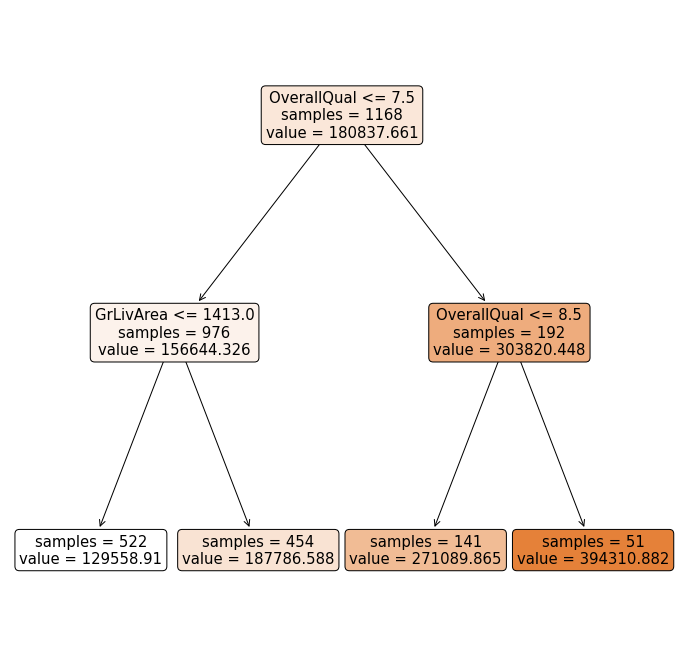

In [43]:
from sklearn.tree import *
import matplotlib.pyplot as plt

# Get feature names and class names to plot decision tree
fn = tp.x_names
cn = ['SalePrice']

# Plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(m, feature_names=fn, class_names=cn, filled=True, impurity=False, rounded=True);

In [44]:
# Complete the following steps
# 1. Import dtreeviz
# 2. Create a viz_model object with the decision tree regressor model
# 3. Display the decision tree

# 1. Import dtreeviz
import dtreeviz

# 2. Create a viz_model object with the decision tree regressor model
viz_model = dtreeviz.model(m, xs.values, y, feature_names=fn, class_names=cn)

# 3. Display the decision tree
v = viz_model.view()
v.show()
v.save('decision_tree.svg')

In [45]:
# Build a bigger decision tree
m = DecisionTreeRegressor()
m.fit(xs.values, y);

In [46]:
# Define a root-mean-squared-error function
def r_mse(pred, y):
    return round(math.sqrt(((pred-y)**2).mean()), 4)

# Define a model root-mean-squared-error function
def m_r_mse(m, xs, y):
    return r_mse(m.predict(xs.values), y)


In [47]:
# Calculate the root-mean-squared-error for the training data
m_r_mse(m, xs, y)

0.0

In [48]:
# Calculate the root-mean-squared-error for the validation data
m_r_mse(m, valid_xs, valid_y)

34882.0332

In [49]:
# Investigate potential overfitting
m.get_n_leaves(), len(xs)

(1124, 1168)

In [50]:
min_records = 20

# Make a new model where each leaf node contains at least min_records
m = DecisionTreeRegressor(min_samples_leaf=min_records)
m.fit(xs.values, y);

# Calculate the root-mean-squared-error for the training data and validation data
m_r_mse(m, xs, y), m_r_mse(m, valid_xs, valid_y)

(33494.4992, 31653.2094)

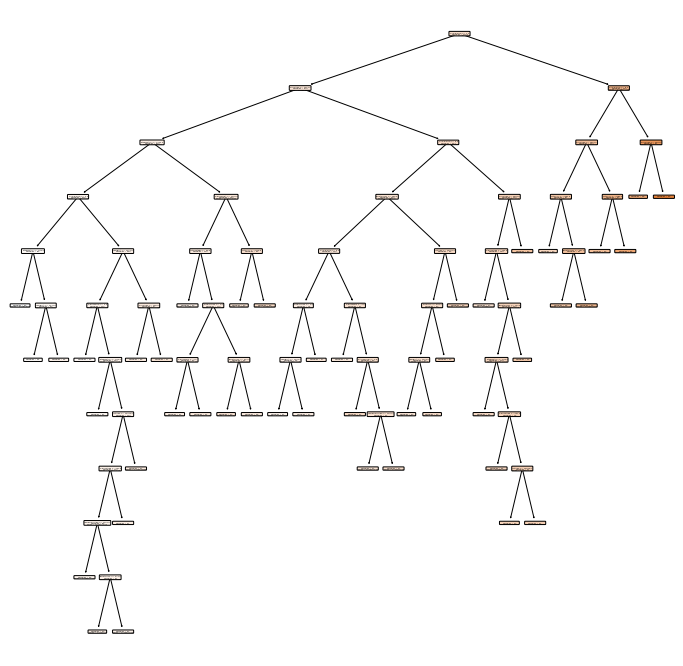

In [51]:
# Plot the new decision tree
plt.figure(figsize=(12,12))
plot_tree(m, feature_names=fn, class_names=cn, filled=True, impurity=False, rounded=True);

In [52]:
# Check the number of leaf nodes of the new model
m.get_n_leaves()

44

## **Part 4: Create a Random Forest**

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Define a function to return a fitted RandomForestsRegressor model
def rf(xs, y, n_estimators=40, max_samples=200,
         max_features=0.5, min_samples_leaf=5, **kwargs):
     return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,
          max_features=max_features, min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs.values, y)

In [54]:
# Create a RandomForestsRegressor model
m = rf(xs, y)

In [55]:
# Calculate the root-mean-squared-error for the training data and validation data
m_r_mse(m, xs, y), m_r_mse(m, valid_xs, valid_y)

(32889.2559, 26822.2298)

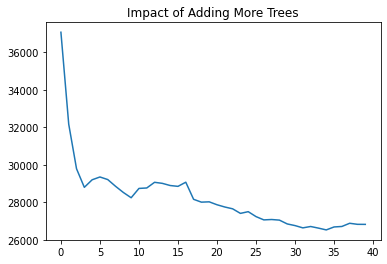

In [56]:
# Visualize the impact of adding more trees with the n_estimators parameter
preds = np.stack([t.predict(valid_xs.values) for t in m.estimators_])

plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);
plt.title('Impact of Adding More Trees');

In [57]:
# Find Out-of-Bag (OOB) error to determine why validation set error is higher than training set error (e.g., is there overfitting?)
# Use our root-mean-squared-error function
r_mse(m.oob_prediction_, y)

# If OOB error is significantly higher than validation set error, then there is overfitting
# If OOB error is significantly lower than validation set error, then there is underfitting

35489.6738

In [58]:
# Determine the confidence of predictions from the RandomForestsRegressor model
preds = np.stack([t.predict(valid_xs.values) for t in m.estimators_])
preds_std = preds.std(0)

# Show the standard deviation for the first 5 predictions
preds_std[:5]

array([29479.52517333, 12721.34756603, 65166.35814714, 30947.11387376,
       47510.57591173])

In [59]:
# As there is a large standard deviation, we can conclude there is a lot of uncertainty in the predictions

In [60]:
# Determine which features are most important to the RandomForestsRegressor model

# Define a function that returns a dataframe of feature importances sorted in descending order using the Mean Decrease in Impurity (MDI) method aka Gini Importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# Find the feature importances for the RandomForestsRegressor model and display the top 10
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
44,OverallQual,0.327655
71,GrLivArea,0.141180
67,TotalBsmtSF,0.108018
54,GarageCars,0.064026
68,1stFlrSF,0.057030
64,BsmtFinSF1,0.053761
73,GarageArea,0.041381
61,YearBuilt,0.027607
60,LotArea,0.019133
18,ExterQual,0.017038


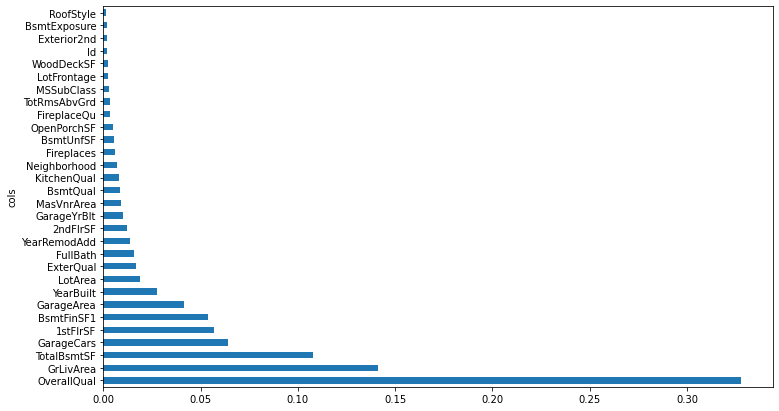

In [61]:
# Plot the feature importances for the RandomForestsRegressor model; show the top 30

# Define a plotting function
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

# Plot the feature importances
plot_fi(fi[:30]);

In [62]:
threshold = 0.005

# Create a list of features that have an importance greater than the threshold
to_keep = fi[fi.imp>threshold].cols

# Determine the number of features that have an importance greater than the threshold
len(to_keep)

20

In [63]:
# Retrain the RandomForestsRegressor model using the features that have an importance greater than the threshold
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y)

In [64]:
# Calculate the root-mean-squared-error for the training data and validation data
m_r_mse(m, xs_imp, y), m_r_mse(m, valid_xs_imp, valid_y)

(32618.8372, 26185.9933)

In [65]:
# Accuracy is about the same, but there are far fewer columns to analyze

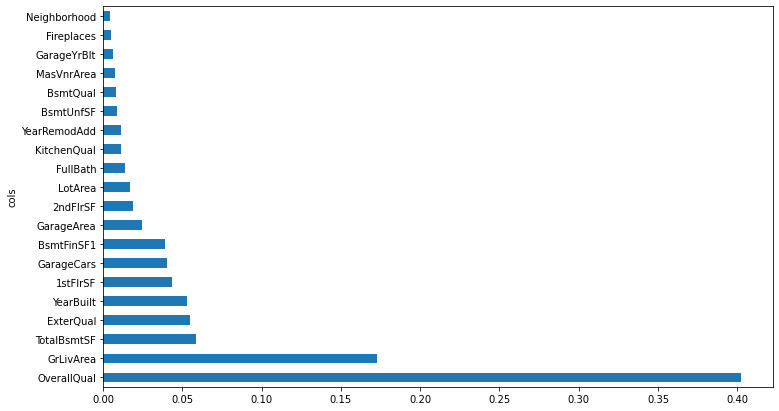

In [66]:
# Plot the feature importance for the new RandomForestsRegressor model
plot_fi(rf_feat_importance(m, xs_imp));

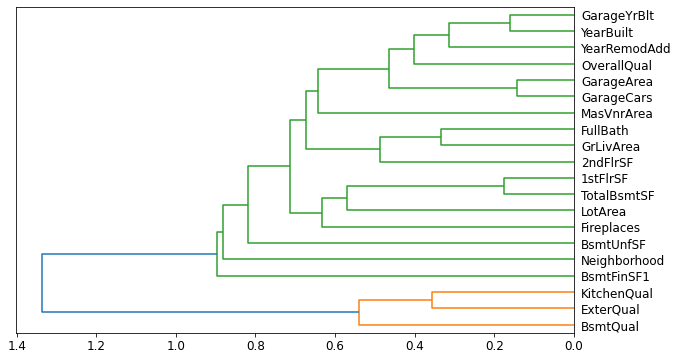

In [67]:
# Cluster to find potentially redundant or unecssary features
from fastbook import *
cluster_columns(xs_imp)

In [68]:
# Define a function that accepts a dataframe of features as input and returns the oob score of a fitted RandomForestsRegressor model
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_samples=200,
           max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [69]:
# Get baseline oob score
get_oob(xs_imp)

0.8040611825415426

In [70]:
# Use list comprehension to compute oob score if each highly correlated feature is removed
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'Fireplaces', 'LotArea', '2ndFlrSF','GrLivArea',
    'GarageYrBlt','YearBuilt','YearRemodAdd','GarageArea','GarageCars',
    'TotalBsmtSF','1stFlrSF', 'KitchenQual','ExterQual','BsmtQual',
    
    )}

{'Fireplaces': 0.8081848541155726,
 'LotArea': 0.8109573030263825,
 '2ndFlrSF': 0.8105256870692106,
 'GrLivArea': 0.787697617300809,
 'GarageYrBlt': 0.8189787211644419,
 'YearBuilt': 0.8139919275818136,
 'YearRemodAdd': 0.8205977759159032,
 'GarageArea': 0.8106917345335748,
 'GarageCars': 0.8059899431623736,
 'TotalBsmtSF': 0.8179326244285092,
 '1stFlrSF': 0.8073622157079134,
 'KitchenQual': 0.8127596995094952,
 'ExterQual': 0.7972899637019664,
 'BsmtQual': 0.8129047318746463}

In [71]:
drops = ['GarageYrBlt', 'GarageArea', '1stFlrSF','BsmtQual','KitchenQual']

# Get the oob score if dropping all the variables in the drops list
get_oob(xs_imp.drop(drops, axis=1))

0.8197766933411488

In [72]:
# OOB score is about the same, so we can drop these variables

In [73]:
# Create new train and validation feature dataframes without the variables in the drops list
xs_final = xs_imp.drop(drops, axis=1)
valid_xs_final = valid_xs_imp.drop(drops, axis=1)

In [74]:
# Save the final feature dataframes
xs_final.to_pickle('xs_final.pkl')
valid_xs_final.to_pickle('valid_xs_final.pkl')

In [75]:
# Load the final feature dataframes
xs_final = pd.read_pickle('xs_final.pkl')
valid_xs_final = pd.read_pickle('valid_xs_final.pkl')

In [76]:
# Create a RandomForestsRegressor model using the final feature dataframes and calculate the root-mean-squared-error for the training data and validation data
m = rf(xs_final, y)
m_r_mse(m, xs_final, y), m_r_mse(m, valid_xs_final, valid_y)

(32373.8707, 26568.9393)

In [77]:
# Accuracy is about the same, but there are far fewer columns to analyze

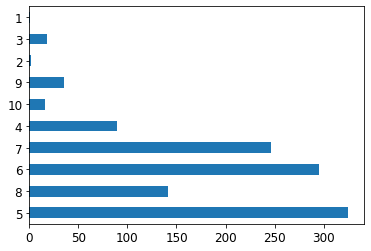

In [78]:
# Check the value_counts of the most important feature in the final set and plot as a bar chart
xs_final.OverallQual.value_counts(sort=False).plot.barh();

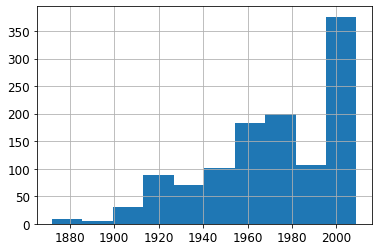

In [79]:
# Create a histogram of YearBuilt for the final dataset and plot as a bar chart
xs_final['YearBuilt'].hist();

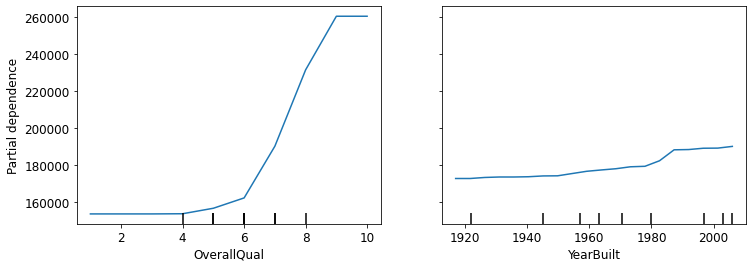

In [81]:
# Create a partialdependence plot for the final dataset for OverallQual and YearBuilt
# Use PartialDependenceDisplay frpom sklearn.inspection

# Import PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay

# Create a plot area
fig, ax = plt.subplots(figsize=(12, 4))

# Create a PartialDependenceDisplay for OverallQual and YearBuilt for the validation dataset
pdp_OverallQual = PartialDependenceDisplay.from_estimator(m, valid_xs_final, ['OverallQual', 'YearBuilt'], grid_resolution=20, ax=ax)

/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:402: U

<module 'matplotlib.pyplot' from '/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

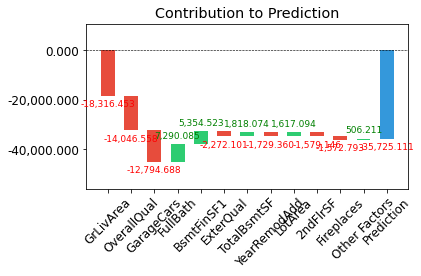

In [87]:
# Install the necessary packages and plot a waterfall chart to display the contributions of each factor to the final prediction for a random record in the final validation dataset

# Install treeinterpreter
! pip install treeinterpreter

# Find the prediction, bias, and contributions fron the first 10 rows of the model
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(m, valid_xs_final.iloc[:10])

# Install waterfallcharts
! pip install waterfallcharts

# Import waterfall_chart
from waterfall_chart import plot as waterfall

# Create the plot formatted where positive contributions are green, negative contributions are red, and the final prediction is blue
# Make the plot extra large for readability
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08,
            rotation_value=45,formatting='{:,.3f}',green_color='#2ecc71',red_color='#e74c3c',blue_color='#3498db',sorted_value=True,
            net_label='Prediction',other_label='Other Factors', Title='Contribution to Prediction')


## Part 5: Finding Out-of-Domain Data and Using a Neural Network for Extrapolation